# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import torch
import numpy as np
from glob import glob

if torch.cuda.is_available():
    # load filenames for human and dog images
    human_files = np.array(glob("data/lfw/*/*"))
    dog_files = np.array(glob("data/dog_images/*/*/*"))
else:
    # load filenames for human and dog images
    human_files = np.array(glob("data/lfw/*/*"))
    dog_files = np.array(glob("data/dog_images/*/*/*"))


# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


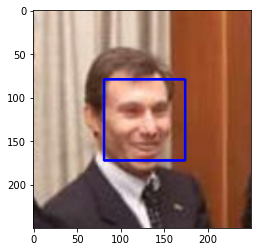

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
* Percentage humans with detected human face: 99%
* Percentage dogs with detected human face: 0%

In [4]:
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

In [5]:
from tqdm import tqdm

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
isface_human = 0
for human in human_files_short:
    if face_detector(human):
        isface_human += 1

print("Percentage humans with detected human face: {}%".format(isface_human)) 

isface_dog = 0
for dog in dog_files_short:
    if face_detector(dog):
        isface_human += 1

print("Percentage dogs with detected human face: {}%".format(isface_dog)) 

Percentage humans with detected human face: 99%
Percentage dogs with detected human face: 0%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [6]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

### Attempt

I tried using a pretrained model as per repo https://github.com/timesler/facenet-pytorch

Unfortunately facenet-pytorch is not available on conda. When i install with pip, there appears to be conflict with the version of pytorch

I may come back to this later. Anyway... 98/0 is good enough for me to work with for now

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [7]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [8]:
from PIL import Image
import torchvision.transforms as T

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image

    #use PIL to open image
    raw_img =  Image.open(img_path)

    # Pytorch pre-trained model (on imagenet) expects images
    # to be normalized with these params
    normalize = T.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])

    transform = T.Compose([
                    # Scale image - resize short dimension to this
                    T.Resize(256),
                    # square crop in the center of the image (80%)
                    T.CenterCrop(224),
                    T.ToTensor(),
                    normalize])

    #apply transforms
    #note unsqueeze(0) adds another dim of 1 at index 0 - model expects batch
    input_img = transform(raw_img).unsqueeze_(0)

    #Feedforward operation
    #Take highest score as predicted class
    #my_tensor.item() gets a Python number from a tensor containing a single value
    predicted_class_index = VGG16(input_img).argmax().item()

    return predicted_class_index

In [9]:
# test output of model
VGG16_predict(dog_files_short[0])

162

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [10]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    if VGG16_predict(img_path) in range(151,268+1,1): 
        return True # true/false
    else:
        return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
* Percentage dogs detected as dog: 95%
* Percentage humans detected as dog: 1%


In [11]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
isdog_dog = 0
for dog in dog_files_short:
    if dog_detector(dog):
        isdog_dog += 1

print("Percentage dogs detected as dog: {}%".format(isdog_dog)) 

isdog_human = 0
for human in human_files_short:
    if dog_detector(human):
        isdog_human += 1

print("Percentage humans detected as dog: {}%".format(isdog_human)) 

Percentage dogs detected as dog: 97%
Percentage humans detected as dog: 2%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [12]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

I will come back to this when i review the project later (once completed). But not sure its worth it given that i'm getting 97pc with the VGG one. I notice that if I transform the input images by taking an 80% center crop, i get 100% accuracy, but i'm hesitant to do this with external 

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [13]:
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms 
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
from tqdm import tqdm

### Define data loaders

Parameters and transforms

In [14]:
from PIL import ImageFile

# To prevent: OSError: image file is truncated (150 bytes not processed)
# which throws when image truncated
ImageFile.LOAD_TRUNCATED_IMAGES = True

Data parameters & transforms

In [15]:
# number of subprocesses to use for data loading
if torch.cuda.is_available():
    num_workers = 4 #±4 per gpu
    batch_size = 50
else:
    num_workers = 0
    batch_size = 200
    
# percentage of training set to use as validation
valid_size = 0.2

# imagenet norm
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

normalize = transforms.Normalize(
    mean,
    std)

augment = transforms.Compose([
    transforms.RandomRotation(30),
    # Crop of random size (default: of 0.08 to 1.0) of the original size
    # and a random aspect ratio (default: of 3/4 to 4/3)
    # This crop is finally resized to given size
    transforms.RandomResizedCrop(64),
    transforms.RandomHorizontalFlip()])

crop_in = transforms.Compose([
    # Resize already done with preprocessing
    #     transforms.Resize(80),
    transforms.CenterCrop(64)])

train_transform = transforms.Compose([
    augment,
    transforms.ToTensor(),
    normalize])

valid_transform = transforms.Compose([
    crop_in,
    transforms.ToTensor(),
    normalize])

test_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    normalize])



Dataloaders

In [16]:
data_dir = 'sml80/data/dogImages' #laptop
# data_dir = '/data/dog_images' #workspace

train_data = datasets.ImageFolder(data_dir + '/train', transform = train_transform)
valid_data = datasets.ImageFolder(data_dir + '/valid', transform = valid_transform)
test_data = datasets.ImageFolder(data_dir + '/test', transform = test_transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle= True, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size = batch_size, shuffle= True, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, num_workers=num_workers)

print("Sample sizes:\nTrain: {}\tValid: {}\tTest: {}".format(len(train_data),len(valid_data),len(test_data)))

# specify the image classes
classes = train_data.classes

# should you require dictionary mapping {class: idx}
# train_data.class_to_idx

Sample sizes:
Train: 6680	Valid: 835	Test: 836


### Visualize a Batch of Training Data

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img, un_normalized=True):

    if un_normalized:
        img = un_normalize(img,mean, std)
    else:
        # rescale normalized image to prevent clipping
        img = (img * 255).numpy().astype(np.uint8)

    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

def un_normalize(tensor, mean, std):
    """
    Args:
        tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        mean: len(3) list or tuple of normalization means
        std: len(3) list or tuple of normalization std
    Returns:
        Tensor: Normalized image.
    """

    for t, m, s in zip(tensor, mean, std):
            t.mul_(s).add_(m)
            # The normalize code -> t.sub_(m).div_(s)
    return tensor    

In [18]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(images.shape)
print(labels.shape)

torch.Size([200, 3, 64, 64])
torch.Size([200])


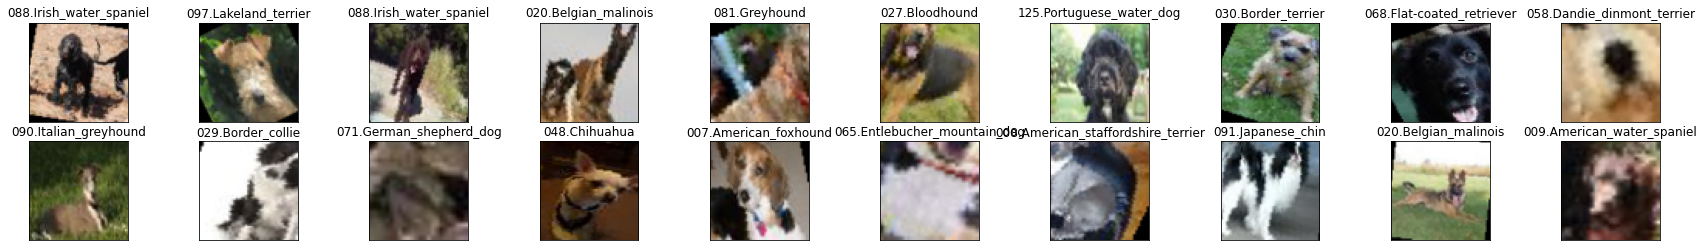

In [19]:
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(30, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
* 64 x 64 input. Smaller is better for computation speed. This size seemed large enough to capture distinguishing features but felt like the lower bound of what's possible
* For quicker training i added a one-off pre-processing to resize all images to 80x80 to improve speed for dataloaders
* Training resized using randomresizecrop. This effectively increases the training set (which is pretty small at ±6000 for 133 classes
    * Added augmentation (30 deg rotation and horizontal flip)
* Validation used relaxed augmentation center-crop only
* Test used no manipulation, only resize

The augmentation made validation closer to training loss. Also, my selection of manipulations resulted in test run accuracy being close to validaiton accuracy.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [20]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.checkpoint_file = 'model_scratch_v3.pt'
        self.epoch = 1
        self.min_validation_loss = float('inf')
        self.max_accuracy = 0.
        
        input_dims = 64
        conv_out_dims = 4 # 64->32->16->8->4
        conv_out_depth = 64
        self.num_labels = 133        
        
        self.linear_input_dims = conv_out_depth * conv_out_dims**2
        print("Conv input wxh {} \nLinear input len {}".format(input_dims, self.linear_input_dims))
        
        # Feature extractor
                            # in, out, kernel
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, conv_out_depth, 3, padding=1)
        self.conv4 = nn.Conv2d(conv_out_depth, conv_out_depth, 3, padding=1)


        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
#         hidden_nodes = int((self.linear_input_dims+self.num_labels)/2)
        self.fc1 = nn.Linear(self.linear_input_dims, 500)
        self.fc2 = nn.Linear(500, 500)
        self.fc3 = nn.Linear(500, self.num_labels)       

        # dropout layer
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.leaky_relu(self.conv1(x)))
        x = self.pool(F.leaky_relu(self.conv2(x)))
        x = self.pool(F.leaky_relu(self.conv3(x)))
        x = self.pool(F.leaky_relu(self.conv4(x)))        
        # flatten image input
        x = x.view(-1, self.linear_input_dims)
        
        # Classifier
        x = self.dropout(x)
        x = F.leaky_relu(self.fc1(x))
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x))
        x = self.dropout(x)

        x = self.fc3(x)
        return x

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
### Round 1
10% accuaracy at first glance doesn't seem to be a demanding hurdle. To begin with I decided to use a very simple CNN architecture:
* 3 conv layers with depth:  16, 32, 64
    * 2x2 maxpool layers after each
    * relu activations
* 2 dense layers with dropout between
* No frills optimisation (CE loss and SGD)
* To ensure it works, i started with only 32x32 input images (less compute power)... not expect much, if any performance

I didn't expect much with such low resolution, but network did learn to my surprise! On first run, validation accuracy improved to 7.2% after epoch 22. Thereafter the model over-fitted, and validation accuracy deteriorated.
Before moving on, I played with optimisation parameters:
* SGD with higher learning rate of 0.05 (vs 0.01 initially) reached 9% accuracy at epoch 6
* Adam required lower learning rates to work. A rate of 0.003125 reached 7.2% at epoch 5. (Comment: i played around with adam throughout this excercise - with later iterations of the model... but it didn't perform better than SGD in my experience)

### Round 2
Tried increasing the input image resolution to 64x64. Any bigger and I felt that i would have to add more layers to the CNN and classifier. For this excercise i want to try keep it minimal. I was surprised to find no improvement in validation accuracy with this change (leaving rest unchanged).

I added layers:
* a fourth conv layer with equal input and output depth
    * increasing depth of the 4th layer had worse performance
* a third linear layer with equal input and output nodes
    * got idea for these same-in / same-out layers by observing VGG16 architecture
    
This got me to 10% test accuracy on the dot (whew!).

I then started augmenting the training data. The model learned far slower, but got up to 17% on the test. It took 228 epochs to get there. It seemed to still be learning but i ran out of patience. 
Very impressive boost from data augmentation. When viewing the training images, i felt perhaps it was too agressive, but when i relaxed the augmentation, the model performed worse. Also with agressive the accuracy on the Test set was very close to that achieved on the Validation set.
* "Agressive": 30deg rotation, random-resize-crop, horiz flip
* "Relaxed": 10deg rotation, random-crop, horiz flip

### Round 3
This ended up being more of a fine-tuning round. I played around with ideas like batch normalization without success. For example, adding a BN layer just before the first linear layer decreased the accuracy on the fully trained model noticably. It trained much faster in the begining (looking promising) with a surprising >4% accuracy on Epoch1. But model performance plateaued early. What did work and incorporated into the final model was:
* Use leaky_relus
* Initialize weights with Kaimer (for both conv and linear layers). Bias left unchanged from default init.
* Increase dropout to 50% (from 25%)

Increasing dropout made a difference. The model took far longer to train but one of my benchmark runs resulted in validation accuracy improving from 21% to 29%. But in this run I wasn't using agressive augmentation, so testing accuracy was only 17%.

The final model presented tested with a 24% accuaracy. I believe that I could get this up to 29% if trained with 50% dropout, but training was taking a very long time and I wanted to preserve my GPU time.

### My personal learnings
* Speed helps! My first model runs were processing at 80 images per second. My final setup was running at 2000ps. Improvements were
    * Use smaller images. 
    * Furthermore do one-off preprocessing of images, standardising them to a smaller size. A bottleneck even on GPU was the loading of images.
    * Push envelope on learning rates
* Use a GPU and optimise for it
    * 4 workers per cpu as rule of thumb
    * avoid .cpu() .numpy() .item(), use .detach() if needed
    * maximise your batch size to limit of memory
* Make it difficult to learn. Takes longer, but final trained model achieved far higher accuracy.
    * Agressive augmentaion worked
    * Higher dropout worked
* Simpler works
    * Faster means more iterations
    * I found that in general, when trying more "fancy" stuff that performance actually decreased. It could be that i don't understand how to use these fancy tools. But my rule-of-thumb would be to apply each new idea with discernment and caution.
    

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [21]:
# instantiate the CNN
model_scratch = Net()

Conv input wxh 64 
Linear input len 1024


In [22]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion_scratch = nn.CrossEntropyLoss()

# specify optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.05)

In [23]:
def weights_init_kaiming(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='leaky_relu')
        # leave bias unchanged (-std, std), where std different for conv and linear

model_scratch.apply(weights_init_kaiming)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [24]:
import time

def train(n_epochs, loaders, model, optimizer, criterion):
    """returns trained model"""

    is_cuda_available = torch.cuda.is_available()
    if is_cuda_available:
        model = model.cuda()

    dataset_size = len(loaders['train'].dataset)
    batch_size = loaders['train'].batch_size
    print("Training & validating on {} samples in batches of {}".format(dataset_size, batch_size))
    print("Random accuracy is {:.2f}%\n".format(100./model.num_labels))

    
    for epoch in range(model.epoch, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        start = time.time()
        
        ###################
        # train the model #
        ###################
        model.train()
        cuml_batch_loss = 0.0
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if is_cuda_available:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update avg training loss
            cuml_batch_loss += loss.data
            train_loss = model.num_labels**-0.5 * cuml_batch_loss / (batch_idx+1)
           # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 
            elapsed_time = float(time.time() - start)
            speed = batch_size*batch_idx / elapsed_time if elapsed_time > 0 else 0
            
            if batch_idx == 0:
                begin_loss = train_loss
            
            #Monitor every batch for currently executing epoch
            print("{:.0f}% \tTraining Loss: {:.6f} --> {:.6f} \t#/s: {:.1f}".format(100.*batch_idx*batch_size/dataset_size, begin_loss, train_loss, speed), end='\r')

        ######################    
        # validate the model #
        ######################
        model.eval()

        cuml_batch_loss = 0.0
        correct = 0.
        total = 0.
        
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if is_cuda_available:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate avg batch loss
            loss = criterion(output, target)
            cuml_batch_loss += loss.data
            ## Note to grader - I normalise by the number of labels in order to have a loss
            #    metric that is more comparable across models / problems
            valid_loss = model.num_labels**-0.5 * cuml_batch_loss / (batch_idx+1)
            
            # convert output probabilities to predicted class
            pred = output.data.max(1, keepdim=True)[1]
            # compare predictions to true label
            correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
            total += data.size(0)
            accuracy = 100. * correct / total
            #Monitor every batch for currently executing epoch
            print("Batch: {:.1f} \tValidation Loss: {:.6f}\tTest Accuracy: {:.1f}% ({}/{})"
                  .format(batch_idx, valid_loss, accuracy, correct, total), end='\r')
            
        # print training/validation statistics
        print('',end='\r')                
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} |v/t={:.2f}\tAccuracy: {:.1f}% ({:.0f}/{:.0f})'
              .format(epoch, train_loss, valid_loss, valid_loss/train_loss, 100. * correct / total, correct, total))
        
        ## TODO: save the model if validation loss has decreased
        if (valid_loss <= model.min_validation_loss) and (accuracy >= model.max_accuracy):
            print('  Checkpoint:\t Loss ({:.6f} --> {:.6f})\tAccuracy ({:.1f}% ++> {:.1f}%)'.format(
            model.min_validation_loss,
            valid_loss,
            model.max_accuracy,
            accuracy))
            checkpoint = {'epoch': epoch,
                          'min_validation_loss': model.min_validation_loss,
                          'max_accuracy': model.max_accuracy,
                          'state_dict' : model.state_dict()}
            torch.save(checkpoint, model.checkpoint_file)
            model.min_validation_loss = valid_loss 
            model.max_accuracy = accuracy
        elif valid_loss/train_loss > 1.25 and accuracy < model.max_accuracy: #quit training if validation deteriorating
            break
            
    # return trained model
    return model

In [25]:
# To save resources - load already trained version an train last leg
checkpoint = torch.load('model_scratch_final.pt',map_location=torch.device('cpu'))
model_scratch.load_state_dict(checkpoint['state_dict'])
model_scratch.epoch = checkpoint['epoch']
model_scratch.min_validation_loss = checkpoint['min_validation_loss']
model_scratch.max_accuracy = checkpoint['max_accuracy']

In [26]:
loaders_scratch = {'train': train_loader, 'valid' : valid_loader, 'test' : test_loader}
from IPython.display import Audio
sound_file = 'https://www.soundjay.com/button/beep-05.mp3'

try:
    # train the model
    model_scratch = train(2000, loaders_scratch, model_scratch, optimizer_scratch, 
                          criterion_scratch)
    # beep when finished
    Audio(sound_file, autoplay=True)
except KeyboardInterrupt:
    pass
    

Training & validating on 6680 samples in batches of 200
Random accuracy is 0.75%

Epoch: 147 	Training Loss: 0.248499 	Validation Loss: 0.292138 |v/t=1.18	Accuracy: 24.3% (203/835)


In [42]:
# load the model that got the best validation accuracy
checkpoint = torch.load('model_scratch_v3.pt',map_location=torch.device('cpu'))
model_scratch.load_state_dict(checkpoint['state_dict'])
model_scratch.epoch = checkpoint['epoch']
model_scratch.min_validation_loss = checkpoint['min_validation_loss']
model_scratch.max_accuracy = checkpoint['max_accuracy']

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [27]:
def test(loaders, model, criterion):
    
    is_cuda_available = torch.cuda.is_available()
    if is_cuda_available:
        model = model.cuda()
        
    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    cuml_batch_loss = 0.
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if is_cuda_available:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        cuml_batch_loss += loss.data
        test_loss = model.num_labels**-0.5 * cuml_batch_loss/(batch_idx + 1)
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        #  todo: avoid .cpu() .numpy() as slows performance on GPU
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
        
        #Monitor every batch for currently executing epoch
        print("Batch: {} \tTest Loss: {:.6f}\tTest Accuracy: {:.1f}% ({}/{})"
              .format(batch_idx, test_loss,100. * correct / total, correct, total), end='\r')

    print(' '*200,end='\r')        
    print('Test Loss: {:.6f}'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch)

Test Loss: 0.292907                                                                                                                                                                                     

Test Accuracy: 22% (191/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [28]:
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms 
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
from tqdm import tqdm

In [29]:
## TODO: Specify data loaders

In [30]:
input_image_size = 224 #assume square

# number of subprocesses to use for data loading
if torch.cuda.is_available():
    num_workers = 4 #±4 per gpu
    batch_size = 50
else:
    num_workers = 0
    batch_size = 20
    
# percentage of training set to use as validation
valid_size = 0.2

# imagenet norm
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

normalize = transforms.Normalize(
    mean,
    std)

augment = transforms.Compose([
    transforms.RandomRotation(30),
    # Crop of random size (default: of 0.08 to 1.0) of the original size
    # and a random aspect ratio (default: of 3/4 to 4/3)
    # This crop is finally resized to given size
    transforms.RandomResizedCrop(input_image_size),
    transforms.RandomHorizontalFlip()])

crop_in = transforms.Compose([
    # Resize already done with preprocessing
    #     transforms.Resize(80),
    transforms.CenterCrop(input_image_size)])

train_transform = transforms.Compose([
    augment,
    transforms.ToTensor(),
    normalize])

valid_transform = transforms.Compose([
    crop_in,
    transforms.ToTensor(),
    normalize])

test_transform = transforms.Compose([
    transforms.Resize((input_image_size, input_image_size)),
    transforms.ToTensor(),
    normalize])



In [31]:
data_dir = 'sml280/data/dog_images' #laptop
# data_dir = '/data/dog_images' #workspace

train_data = datasets.ImageFolder(data_dir + '/train', transform = train_transform)
valid_data = datasets.ImageFolder(data_dir + '/valid', transform = valid_transform)
test_data = datasets.ImageFolder(data_dir + '/test', transform = test_transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle= True, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size = batch_size, shuffle= True, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, num_workers=num_workers)

print("Sample sizes:\nTrain: {}\tValid: {}\tTest: {}".format(len(train_data),len(valid_data),len(test_data)))

# specify the image classes
classes = train_data.classes

# should you require dictionary mapping {class: idx}
# train_data.class_to_idx



Sample sizes:
Train: 6680	Valid: 835	Test: 836


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [32]:
import torchvision.models as models
import torch.nn as nn

# define the CNN architecture
class Net(nn.Module):
    def __init__(self, num_classes, pre_trained = models.vgg16(pretrained=True)):
        super(Net, self).__init__()
        
        #Tracking meta-data
        self.checkpoint_file = 'model_transfer_v1.pt'
        self.epoch = 1
        self.min_validation_loss = float('inf')
        self.max_accuracy = 0.
        self.num_labels = num_classes        

        ### Customize
        self.features = pre_trained.features
        self.classifier = pre_trained.classifier
        
        # Freeze training for all "features" layers
        for param in self.features.parameters():
            param.requires_grad = False

        # Replace final layer
        self.classifier[6] = nn.Linear(
            self.classifier[6].in_features, 
            num_classes)

    def forward(self, x):
        #return super(Net, self).forward(x)
        x = self.features(x)
        x = x.flatten(start_dim=1)
        return self.classifier(x)
        
        
#         input_dims = 64
#         conv_out_dims = 4 # 64->32->16->8->4
#         conv_out_depth = 64
        
#         self.linear_input_dims = conv_out_depth * conv_out_dims**2



In [33]:
model_transfer = Net(133)
model_transfer
# for param in model_transfer.parameters():
#     print(param.name," ",param.requires_grad)

Net(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
I decided to retain the VGG architecture given that it works very well on the imagenet data. I could have tried replacing the classifier with a less-dense network, considering that we're only predicting 133 classes instaed of 1000. But i knew leaving the architecture as-is would work well but take a little longer to train. 

I froze the weights in the feature layer, and only had to train the classifier. The model trained rapidly with validation accuracy exceeding 60% by epoch 4.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [34]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.parameters(), lr=0.05)

In [35]:
def weights_init_kaiming(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='leaky_relu')
        # leave bias unchanged (-std, std), where std different for conv and linear

model_transfer.classifier.apply(weights_init_kaiming)
# model_transfer.classifier[6].bias.data.sum()
# model_transfer.classifier[6].weight.data.sum()

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=133, bias=True)
)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [36]:
import time

def train(n_epochs, loaders, model, optimizer, criterion):
    """returns trained model"""

    is_cuda_available = torch.cuda.is_available()
    if is_cuda_available:
        model = model.cuda()

    dataset_size = len(loaders['train'].dataset)
    batch_size = loaders['train'].batch_size
    print("Training & validating on {} samples in batches of {}".format(dataset_size, batch_size))
    print("Random accuracy is {:.2f}%\n".format(100./model.num_labels))

    
    for epoch in range(model.epoch, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        start = time.time()
        
        ###################
        # train the model #
        ###################
        model.train()
        cuml_batch_loss = 0.0
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if is_cuda_available:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update avg training loss
            cuml_batch_loss += loss.data
            train_loss = model.num_labels**-0.5 * cuml_batch_loss / (batch_idx+1)
           # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 
            elapsed_time = float(time.time() - start)
            speed = batch_size*batch_idx / elapsed_time if elapsed_time > 0 else 0
            
            if batch_idx == 0:
                begin_loss = train_loss
            
            #Monitor every batch for currently executing epoch
            print("{:.0f}% \tTraining Loss: {:.6f} --> {:.6f} \t#/s: {:.1f}".format(100.*batch_idx*batch_size/dataset_size, begin_loss, train_loss, speed), end='\r')

        ######################    
        # validate the model #
        ######################
        model.eval()

        cuml_batch_loss = 0.0
        correct = 0.
        total = 0.
        
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if is_cuda_available:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate avg batch loss
            loss = criterion(output, target)
            cuml_batch_loss += loss.data
            ## Note to grader - I normalise by the number of labels in order to have a loss
            #    metric that is more comparable across models / problems
            valid_loss = model.num_labels**-0.5 * cuml_batch_loss / (batch_idx+1)
            
            # convert output probabilities to predicted class
            pred = output.data.max(1, keepdim=True)[1]
            # compare predictions to true label
            correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
            total += data.size(0)
            accuracy = 100. * correct / total
            #Monitor every batch for currently executing epoch
            print("Batch: {:.1f} \tValidation Loss: {:.6f}\tTest Accuracy: {:.1f}% ({}/{})"
                  .format(batch_idx, valid_loss, accuracy, correct, total), end='\r')
            
        # print training/validation statistics
        print('',end='\r')                
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} |v/t={:.2f}\tAccuracy: {:.1f}% ({:.0f}/{:.0f})'
              .format(epoch, train_loss, valid_loss, valid_loss/train_loss, 100. * correct / total, correct, total))
        
        ## TODO: save the model if validation loss has decreased
        if (valid_loss <= model.min_validation_loss) and (accuracy >= model.max_accuracy):
            print('  Checkpoint:\t Loss ({:.6f} --> {:.6f})\tAccuracy ({:.1f}% ++> {:.1f}%)'.format(
            model.min_validation_loss,
            valid_loss,
            model.max_accuracy,
            accuracy))
            checkpoint = {'epoch': epoch,
                          'min_validation_loss': model.min_validation_loss,
                          'max_accuracy': model.max_accuracy,
                          'state_dict' : model.state_dict()}
            torch.save(checkpoint, model.checkpoint_file)
            model.min_validation_loss = valid_loss 
            model.max_accuracy = accuracy
        elif valid_loss/train_loss > 1.25 and accuracy < model.max_accuracy: #quit training if validation deteriorating
            break
            
    # return trained model
    return model

In [41]:
loaders_scratch = {'train': train_loader, 'valid' : valid_loader, 'test' : test_loader}

In [39]:
from IPython.display import Audio
sound_file = 'https://www.soundjay.com/button/beep-05.mp3'

# train the model
try:
    model_transfer = train(2000, loaders_scratch, model_transfer, optimizer_transfer, 
                      criterion_transfer)
    Audio(sound_file, autoplay=True)
except KeyboardInterrupt:
    print("\nUser terminated")



Training & validating on 6680 samples in batches of 20
Random accuracy is 0.75%

2% 	Training Loss: 0.953439 --> 13.080423 	#/s: 3.7
User terminated


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [42]:
# load the model that got the best validation accuracy
checkpoint = torch.load('model_transfer_final.pt',map_location=torch.device('cpu'))
model_transfer.load_state_dict(checkpoint['state_dict'])
model_transfer.epoch = checkpoint['epoch']
model_transfer.min_validation_loss = checkpoint['min_validation_loss']
model_transfer.max_accuracy = checkpoint['max_accuracy']

In [43]:
def test(loaders, model, criterion):
    
    is_cuda_available = torch.cuda.is_available()
    if is_cuda_available:
        model = model.cuda()
        
    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    cuml_batch_loss = 0.
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if is_cuda_available:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        cuml_batch_loss += loss.data
        test_loss = model.num_labels**-0.5 * cuml_batch_loss/(batch_idx + 1)
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        #  todo: avoid .cpu() .numpy() as slows performance on GPU
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
        
        #Monitor every batch for currently executing epoch
        print("Batch: {} \tTest Loss: {:.6f}\tTest Accuracy: {:.1f}% ({}/{})"
              .format(batch_idx, test_loss,100. * correct / total, correct, total), end='\r')

    print(' '*200,end='\r')        
    print('Test Loss: {:.6f}'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_transfer, criterion_transfer)

Test Loss: 0.066801                                                                                                                                                                                     

Test Accuracy: 82% (686/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [44]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from PIL import Image

# list of class names by index, i.e. a name can be accessed like class_names[0]
# class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path)
#     img = img.Resize(224)
#     print(torch.unsqueeze(test_transform(img),0).shape)
    output = model_transfer(test_transform(img).unsqueeze_(0))
    idx = output.argmax()
    predicted_class = class_names[idx]
    return idx.item(), predicted_class

predict_breed_transfer("sml280/data/dog_images/train/001.Affenpinscher/Affenpinscher_00070.jpg")

(0, 'Affenpinscher')

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [45]:
most_confident = np.zeros((len(class_names)))
most_confident_file = ['']*len(class_names)

In [46]:
from PIL import ImageFile
import torch.nn.functional as F
import json
from glob import glob

    
def find_most_confident_predictions():
    # To prevent: OSError: image file is truncated (150 bytes not processed)
    # which throws when image truncated
    ImageFile.LOAD_TRUNCATED_IMAGES = True
    ref_files = np.array(glob("data/dog_images/valid/*/*"))
    n = len(ref_files)

    # for i, dog in enumerate(dog_files):
    for i in range(n):

        dog = ref_files[i]
        img = Image.open(dog)
#         score = F.softmax(model_transfer(test_transform(img).unsqueeze_(0)),dim=1)
        score = model_transfer(test_transform(img).unsqueeze_(0))
        idx = score.argmax()
        print('Processing {} of {}: class {} - {}'.format(i,n,idx,dog),end='\r')
        if score[0][idx] > most_confident[idx]:
            most_confident[idx] = score[0][idx]
            most_confident_file[idx] = dog 


    # Save to file when done
    mc_dict = dict(zip(most_confident_file, most_confident))
    # open output file for writing
    with open('most-confident-predictions.json', 'w') as filehandle:
        json.dump(mc_dict, filehandle)        
    

In [47]:
import json
from os import path

file_name = "most-confident-predictions.json"
if path.exists(file_name):
    # open output file for reading
    with open(file_name, 'r') as filehandle:
        mc_dict = json.load(filehandle)
        keys, values = mc_dict.keys(), mc_dict.values()
        most_confident_file, most_confident = list(keys), np.array(values)
else:
    find_most_confident_predictions()
# type(basicList)    

In [48]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib.image as mpimg
%matplotlib inline

def run_app(img_path):

    fig, (ax1, ax2) = plt.subplots(1, 2)

    ## handle cases for a human face, dog, and neither
    is_dog = dog_detector(img_path)
    is_human = face_detector(img_path)


    
    if is_dog:
        print('Hello Dog. You look like a ',end='')
        ax1.set_title('Detected dog...')

    elif is_human and not is_dog:
        print('Hello Human. You look like a ',end='')
        ax1.set_title('Detected human...')
        
    else:
        display('Im confused. No dogs or humans detected.')        
    
    class_idx, breed  = predict_breed_transfer(img_path)    
    print(breed)
    
    if most_confident_file[class_idx] != '':
        example = mpimg.imread(most_confident_file[class_idx])
        ax2.imshow(example)
    
    img = mpimg.imread(img_path)

#     figure()
#     plt.imshow(img)
#     plt.show()
    ax1.imshow(img)
    ax2.set_title('...looks like this')
    
    
    plt.show()

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
Performance is as expected. Dog breed classifier is quite accurate. Human breed classifier doesn't work that well but for some faces, it is really striking.

 * Program a object detector so that we can classify multiple dogs and humans in one image. Link below gives some hints
     * https://www.pyimagesearch.com/2018/05/14/a-gentle-guide-to-deep-learning-object-detection/
     * I tried to predict only on the face returned by a bounding box - but this didn't work well, just returning the same breed of dog for most faces shown
 * If a human face, pass a grayscale image to the breed_classifier. Looking at results, i notice that hair colour plays a role in the predicted breed. I would prefer that facial features are weighted more than color
 * For a dog, if predicted breed confidence is low.... because cross-breed shown, then give a percentage mix 
 * Find / create a dataset where human faces have been labelled as looking like certain dog breeds, and retrain the dog-breed-classifier on this imageset to create a better human-you-look-like classifier

Hello Dog. You look like a Yorkshire terrier


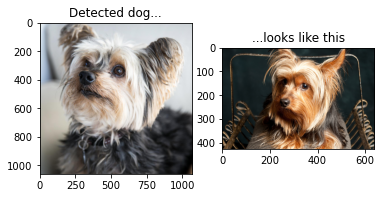

Hello Dog. You look like a Silky terrier


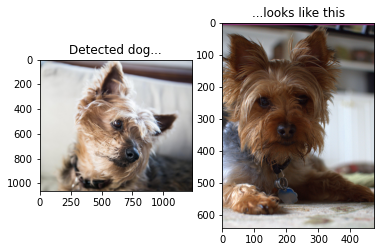

Hello Human. You look like a Dogue de bordeaux


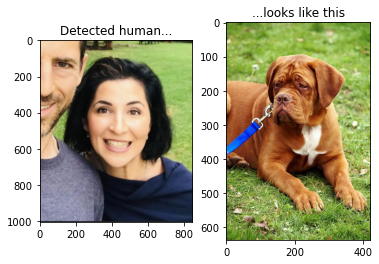

Hello Human. You look like a Silky terrier


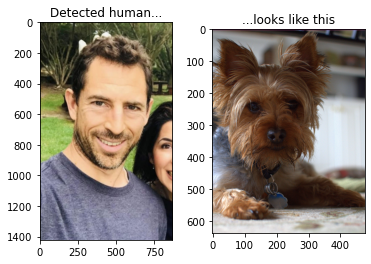

Hello Human. You look like a Pharaoh hound


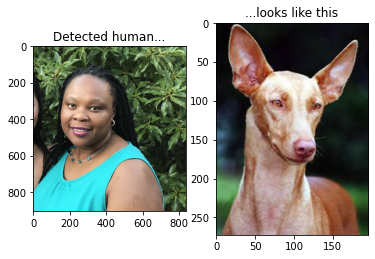

Hello Human. You look like a Chinese crested


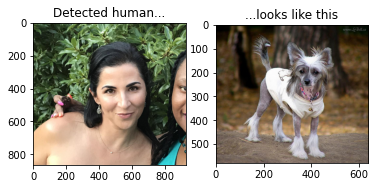

Hello Human. You look like a Lowchen


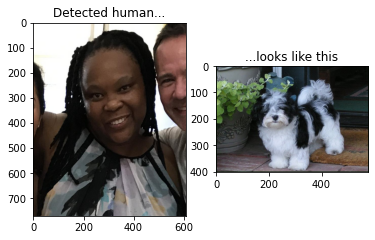

In [52]:
# Run on my peeps
personal_files = ['shanti.jpg','ruby.jpg','karina.jpg','guy.jpg','akona2.jpg','karina2.jpg','akona.jpg']
for file in personal_files:
    run_app('data/my_peeps/'+file)

Hello Human. You look like a Chinese crested


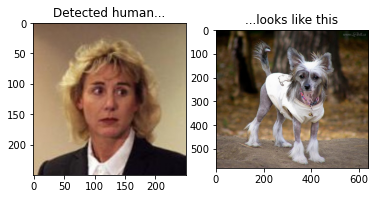

In [53]:
from IPython.display import clear_output

# Cycle through humans

try:
    while True:
        clear_output()
        human = np.random.choice(human_files)    
        run_app(human)
        input()
except KeyboardInterrupt:
    pass

Hello Dog. You look like a Bedlington terrier


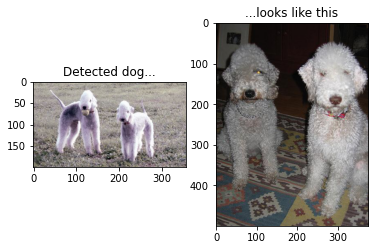

In [54]:
from IPython.display import clear_output

# Cycle through dogs

try:
    while True:
        clear_output()
        dog = np.random.choice(dog_files)    
        run_app(dog)
        input()
except KeyboardInterrupt:
    pass

### Most dog-like humans

In [55]:
# todo save class so can have one human per breed. Certain breeds are just popular for human faces.

def find_most_dog_like():
    n = len(human_files)
    scores = np.zeros(n)
    for i in range(n):
        print('Processing {} of {}'.format(i,n),end='\r')
        img = Image.open(human_files[i])
        output = F.softmax(model_transfer(test_transform(img).unsqueeze_(0)),dim=1)
        scores[i] = output.max()

    # Save to file when done
    mc_dict = dict(zip(human_files, scores))
    # open output file for writing
    with open('most-dog-like.json', 'w') as filehandle:
        json.dump(mc_dict, filehandle)        

In [56]:
import json
from os import path

file_name = "most-dog-like.json"
if path.exists(file_name):
    # open output file for reading
    with open(file_name, 'r') as filehandle:
        mc_dict = json.load(filehandle)
        keys, values = mc_dict.keys(), mc_dict.values()
        human_files, scores = np.array(list(keys)), np.array(list(values))
else:
    find_most_dog_like()

Queen Elizabeth II Hello Human. You look like a Clumber spaniel


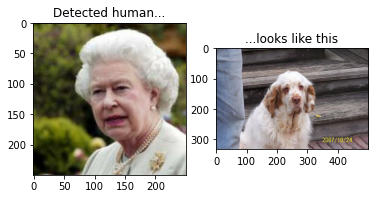

In [57]:
import time

#Cycle automatically through top 100 dog-like faces

try:
    top_dogs = scores.argsort()[-100:][::-1]
    files = human_files[top_dogs]
    for i, file in enumerate(files):
        clear_output(wait=True)
        print(file.split('/')[2].replace("_", " "), end=' ')
#         print(top_dogs[i])
        run_app(file)
        time.sleep(1)
except KeyboardInterrupt:
    pass

### Didn't quite work

The code below attempted to extract the bounding box of the human faces and use this to predict the breed. It classified all test-faces as pharoh hound. So not differentiating. We need to rather get a bounding box for the human object and run this through the classifier.